In [1]:
import pandas as pd

# Read data from CSV

test_data=pd.read_csv(r"C:\Users\shita\OneDrive\Desktop\test.csv")
train_data=pd.read_csv(r"C:\Users\shita\OneDrive\Desktop\Train.csv")
store_data=pd.read_csv(r"C:\Users\shita\OneDrive\Desktop\Store.csv")
sample_data=pd.read_csv(r"C:\Users\shita\OneDrive\Desktop\Sample_Submission.csv")


common_key = 'Store'


# Merge DataFrames
#merged_data = pd.merge(test_data,train_data,store_data,sample_data, on='common_key')

test_data_with_prediction = pd.merge(train_data, store_data, on=common_key, how='left')

test_data_with_prediction

# Save merged data to a new CSV file

test_data_with_prediction.to_csv('test_data_with_prediction.csv', index=False)

C:\Users\shita\AppData\Local\Temp\ipykernel_6800\373405530.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data=pd.read_csv(r"C:\Users\shita\OneDrive\Desktop\Train.csv")


In [2]:
test_data_with_prediction['Date'] = pd.to_datetime(test_data_with_prediction['Date'])


C:\Users\shita\AppData\Local\Temp\ipykernel_6800\2575746428.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  test_data_with_prediction['Date'] = pd.to_datetime(test_data_with_prediction['Date'])


In [3]:
test_data_with_prediction['Year'] = test_data_with_prediction['Date'].dt.year

In [4]:
test_data_with_prediction['Month'] = test_data_with_prediction['Date'].dt.month

In [5]:
test_data_with_prediction['weekDay'] = test_data_with_prediction['Date'].dt.day

In [6]:
test_data_with_prediction['IsWeekday'] = (test_data_with_prediction['DayOfWeek'] < 5).astype(int)


In [7]:
test_data_with_prediction['Quarter'] = test_data_with_prediction['Date'].dt.quarter

In [8]:
test_data_with_prediction['IsMonthStart'] = test_data_with_prediction['Date'].dt.is_month_start.astype(int)

test_data_with_prediction['IsMonthMiddle'] = ((test_data_with_prediction['weekDay'] >= 10) & (test_data_with_prediction['weekDay'] <= 20)).astype(int)

test_data_with_prediction['IsMonthEnd'] = test_data_with_prediction['Date'].dt.is_month_end.astype(int)


In [9]:
test_data_with_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 26 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [10]:
test_data_with_prediction.to_csv('test_data_with_prediction.csv', index=False)

In [11]:
data=pd.read_csv(r"C:\Users\shita\Downloads\test_data_with_prediction.csv")

C:\Users\shita\AppData\Local\Temp\ipykernel_6800\306415544.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r"C:\Users\shita\Downloads\test_data_with_prediction.csv")


In [12]:
data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'weekDay',
       'IsWeekday', 'Quarter', 'IsMonthStart', 'IsMonthMiddle', 'IsMonthEnd'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 26 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

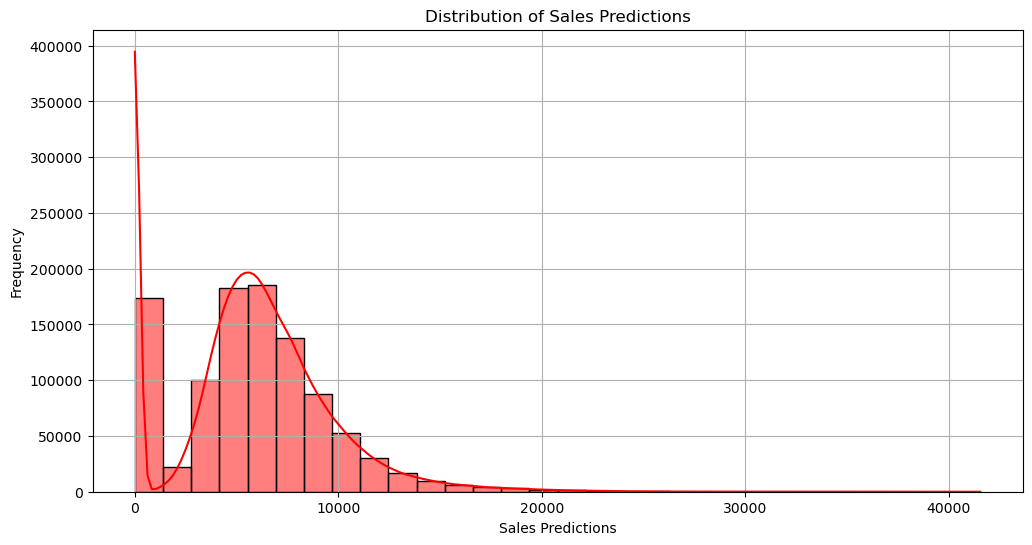

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the SalesPrediction column
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Sales', bins=30, kde=True, color='red')
plt.title('Distribution of Sales Predictions')
plt.xlabel('Sales Predictions')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

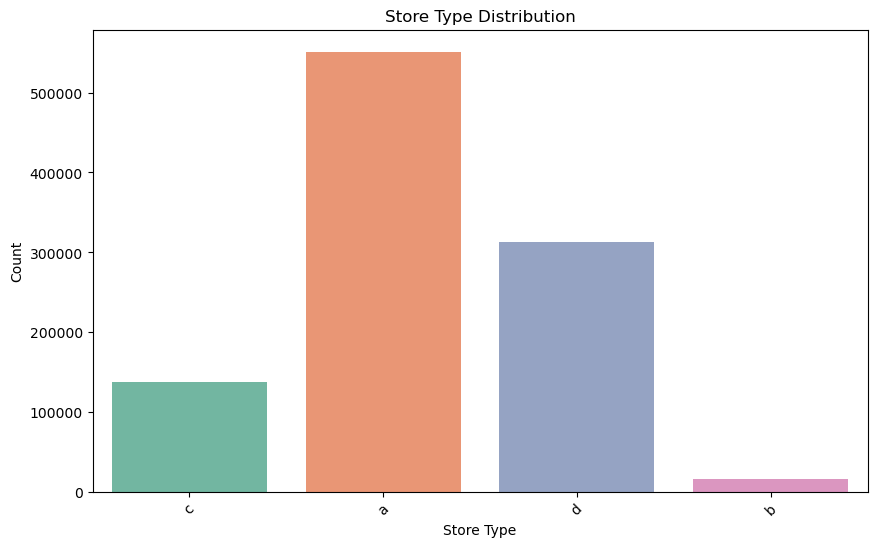

In [15]:
# Example: Bar plot for 'StoreType' counts
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='StoreType', palette='Set2')
plt.title('Store Type Distribution')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

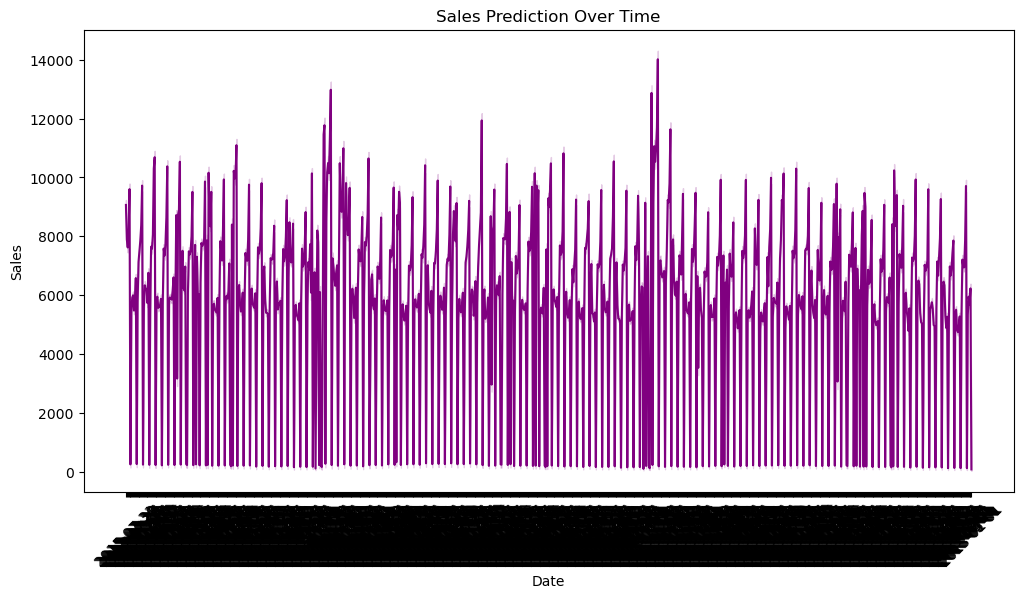

In [16]:
# Example: Line plot for 'SalesPrediction' over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='Sales', color='purple')
plt.title('Sales Prediction Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

C:\Users\shita\AppData\Local\Temp\ipykernel_6800\656698608.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


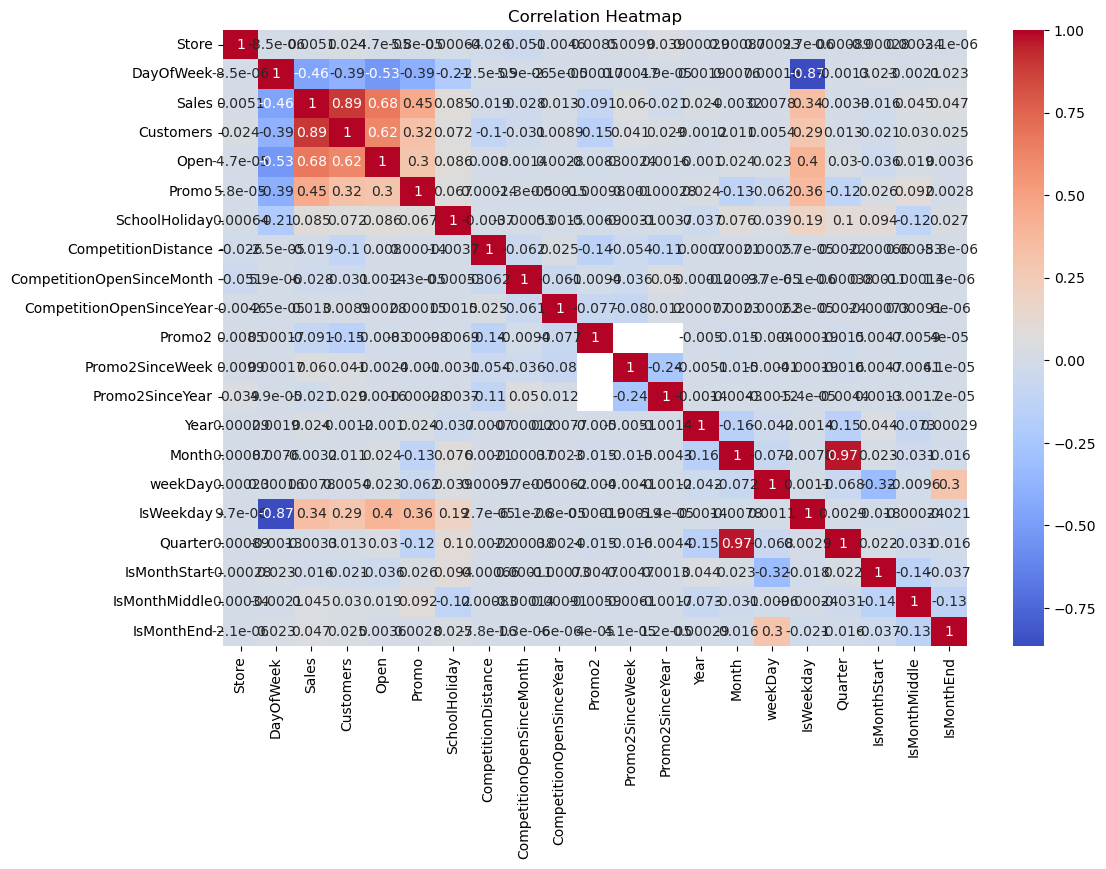

In [17]:
# Example: Correlation heatmap for numerical columns
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\shita\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\shita\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\shita\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\shita\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\shita\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\shita\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hu

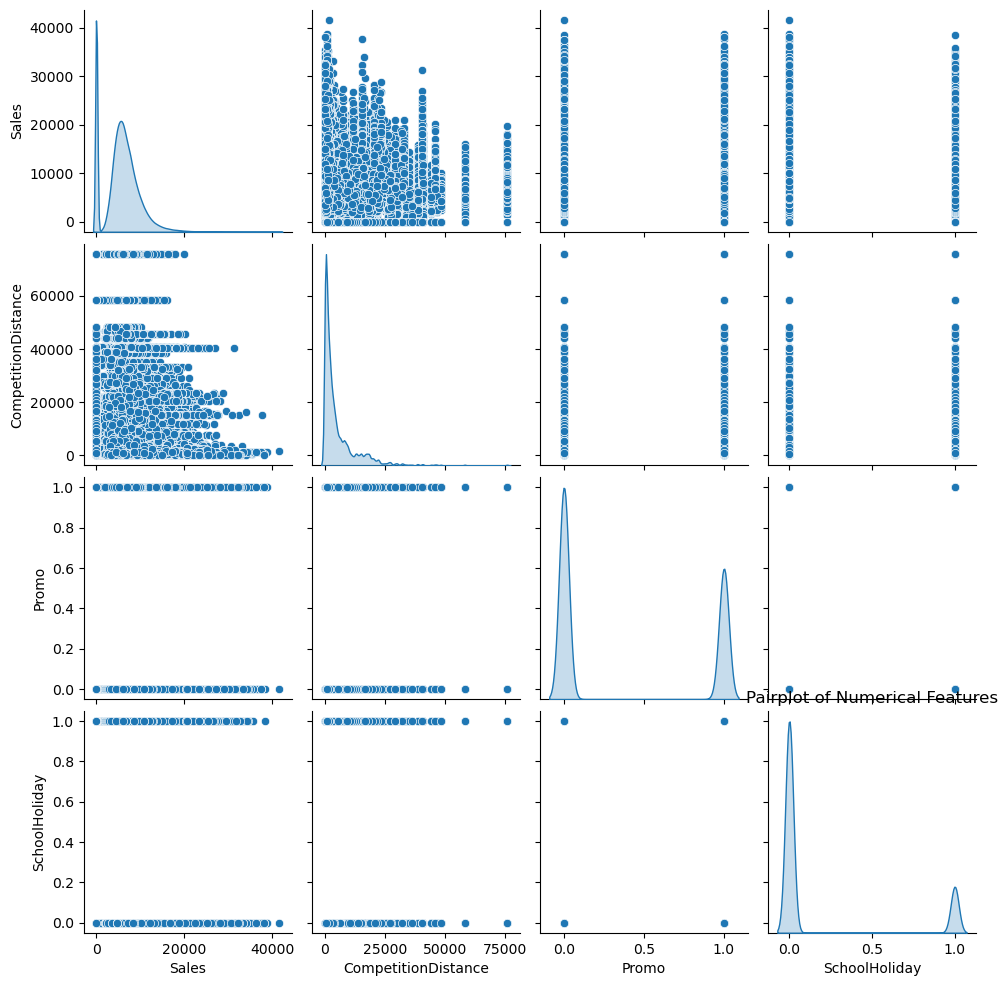

In [18]:
# Example: Pairplot for numerical columns
sns.pairplot(data[['Sales', 'CompetitionDistance', 'Promo', 'SchoolHoliday']], diag_kind='kde', palette='Set2')
plt.title('Pairplot of Numerical Features')
plt.show()

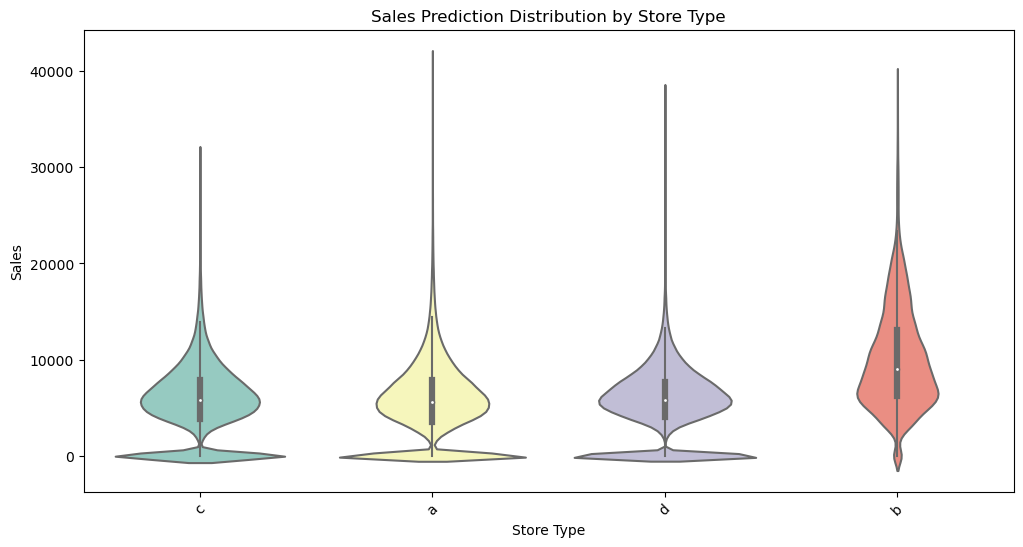

In [19]:
# Example: Violin plot for 'StoreType' vs. 'SalesPrediction'
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='StoreType', y='Sales', palette='Set3')
plt.title('Sales Prediction Distribution by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

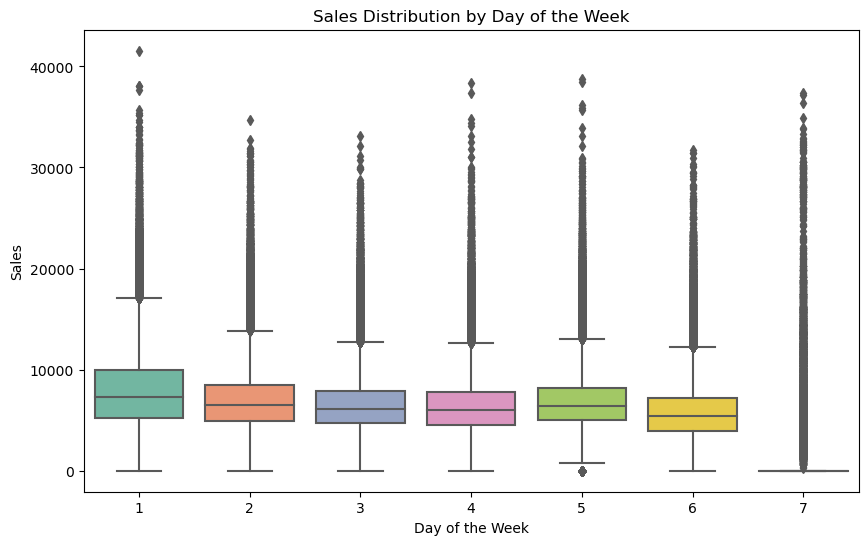

In [20]:
# Example: Box plot for 'Sales' by 'DayOfWeek'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='DayOfWeek', y='Sales', palette='Set2')
plt.title('Sales Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales')
plt.show()

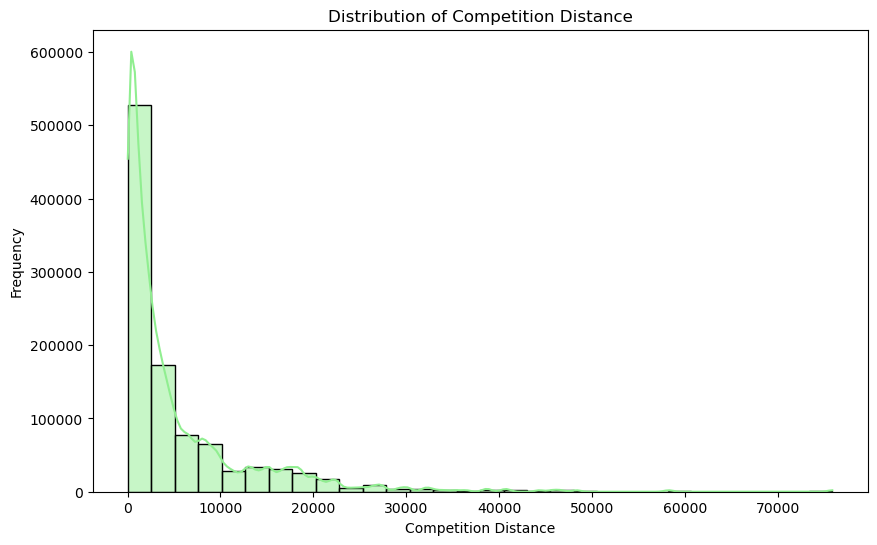

In [21]:
# Example: Distribution plot for 'CompetitionDistance'
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='CompetitionDistance', bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Frequency')
plt.show()

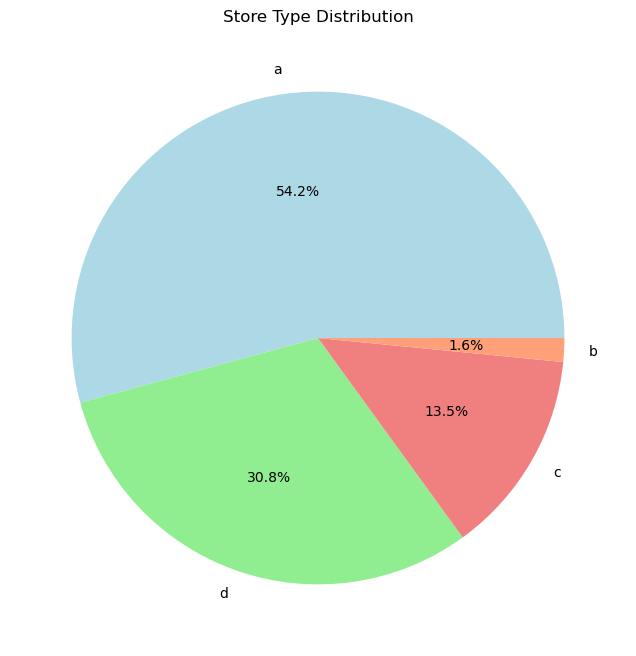

In [26]:
# Example: Pie chart for 'StoreType' distribution
store_type_counts = data['StoreType'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(store_type_counts, labels=store_type_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('Store Type Distribution')
plt.grid()
plt.show()

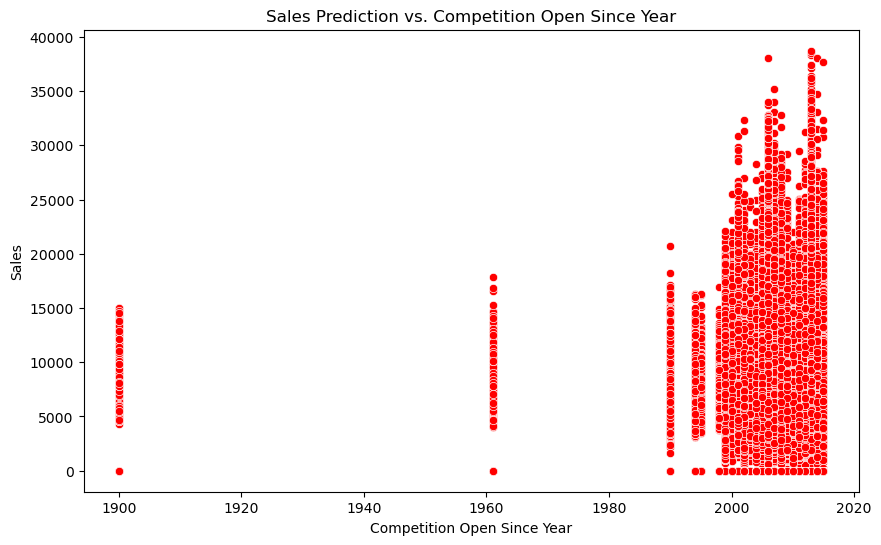

In [23]:
# Example: Scatter plot for 'CompetitionOpenSinceYear' vs. 'Sales'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='CompetitionOpenSinceYear', y='Sales', color='red')
plt.title('Sales Prediction vs. Competition Open Since Year')
plt.xlabel('Competition Open Since Year')
plt.ylabel('Sales')
plt.show()

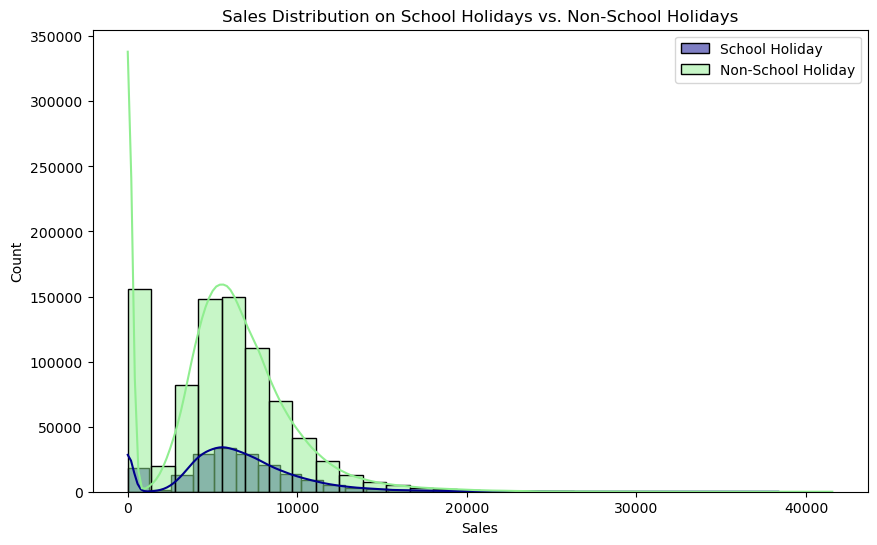

In [24]:
# Example: Histogram of 'Sales' on school holidays vs. non-school holidays
plt.figure(figsize=(10, 6))
sns.histplot(data=data[data['SchoolHoliday'] == 1]['Sales'], bins=30, kde=True, label='School Holiday', color='darkblue')
sns.histplot(data=data[data['SchoolHoliday'] == 0]['Sales'], bins=30, kde=True, label='Non-School Holiday', color='lightgreen')
plt.title('Sales Distribution on School Holidays vs. Non-School Holidays')
plt.xlabel('Sales')
plt.legend()
plt.show()

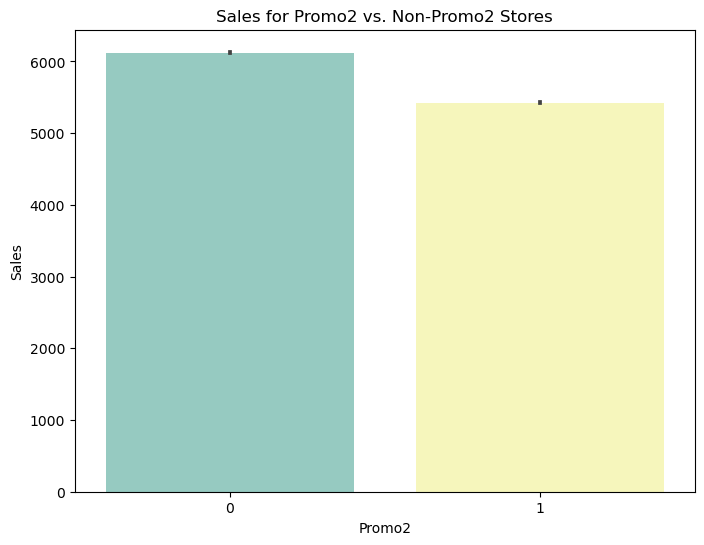

In [25]:
# Example: Bar plot for 'Promo2' vs. 'Sales'

plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Promo2', y='Sales', palette='Set3')
plt.title('Sales for Promo2 vs. Non-Promo2 Stores')
plt.xlabel('Promo2')
plt.ylabel('Sales')
plt.show()